In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Load the dataset (adjust path as needed)
df = pd.read_csv(r"C:\Users\Windows\Downloads\Twitter_Data (1).csv")  # Example dataset

# Check the first few rows
print(df.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [6]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Handle NaN or non-string values by converting to empty string
    if not isinstance(text, str):
        text = ''

    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove URLs and mentions (@username)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)

    # 3. Remove special characters, numbers, and punctuation (except spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 4. Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # 5. Lemmatize the words
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text


In [7]:
df['clean_text'] = df['clean_text'].apply(clean_text)
print(df)

                                               clean_text  category
0       modi promised minimum government maximum gover...      -1.0
1                  talk nonsense continue drama vote modi       0.0
2       say vote modi welcome bjp told rahul main camp...       1.0
3       asking supporter prefix chowkidar name modi gr...       1.0
4       answer among powerful world leader today trump...       1.0
...                                                   ...       ...
162975  crore paid neerav modi recovered congress lead...      -1.0
162976  dear rss terrorist payal gawar modi killing pl...      -1.0
162977                       cover interaction forum left       0.0
162978  big project came india modi dream project happ...       0.0
162979  ever listen like gurukul discipline maintained...       1.0

[162980 rows x 2 columns]


In [8]:
df.head()

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0


In [9]:
df.shape

(162980, 2)

<Axes: xlabel='category', ylabel='count'>

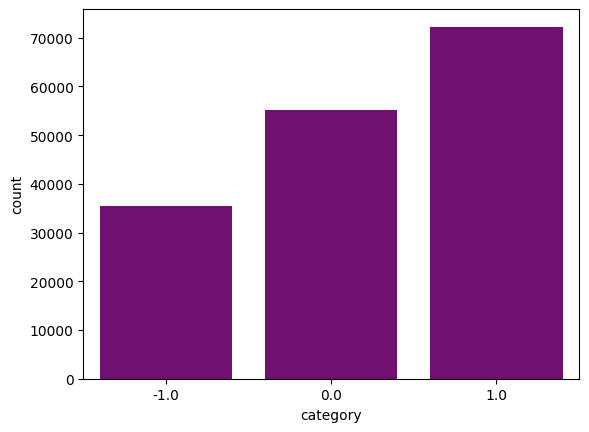

In [13]:
import seaborn as sns 
sns.countplot(x='category',data=df,color='Purple')

In [17]:
df.isnull().sum()

clean_text    0
category      7
dtype: int64

In [20]:
df=df.dropna()
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [21]:
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Transform the cleaned text
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LogisticRegression(max_iter=200)  # Increase max_iter if convergence issues occur

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8788771283939254
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81      7230
         0.0       0.85      0.96      0.90     10961
         1.0       0.91      0.88      0.90     14404

    accuracy                           0.88     32595
   macro avg       0.88      0.87      0.87     32595
weighted avg       0.88      0.88      0.88     32595



In [24]:
import pickle
# Save the trained model and vectorizer to the 'model/' directory
with open('model/sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('model/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)